In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

(2, 200)
(1, 200)


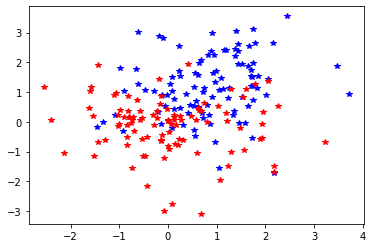

In [4]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+1
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

x=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
X=x
print(X.shape)

print(y.shape)


plt.plot(x[0,:100],x[1,:100],'b*')
plt.plot(x[0,100:],x[1,100:],'r*')

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import random

In [10]:
def seed_torch(seed=1029):
	random.seed(seed)
	os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
	np.random.seed(seed)
	torch.manual_seed(seed)
	torch.cuda.manual_seed(seed)
	torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
	torch.backends.cudnn.benchmark = False
	torch.backends.cudnn.deterministic = True

In [11]:
seed_torch()

In [ ]:
#classify with perceptron

In [17]:
eps=10e-6
def getZ(w,x,b):
  return w@x + b

def sigmoid(z):
  return (1/(1+np.exp(-z)))

def loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps)-(1-y)*np.log(1-yhat+eps), 1)

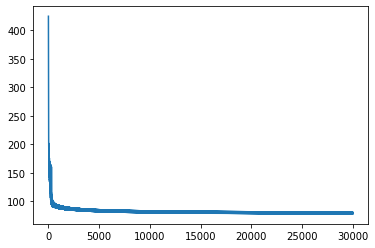

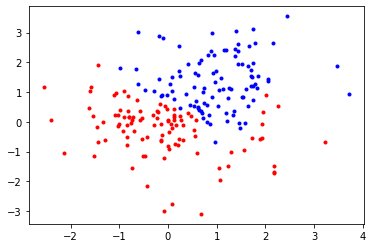

In [24]:
w = np.random.random((1,25))
b = 0
ls = []
lr = 0.0001
num = 5
bs = []
for i in range(num):
  for j in range(num):
    bss = (X[0,:]**i)*((X[1,:])**j)
    bs.append(bss)

basis = np.asarray(bs)

for i in range(30000):
  z=getZ(w,basis,b)
  yhat=sigmoid(z)
  l=loss(y,yhat)
  ls.append(l)
  dz=yhat-y
  dw=dz@basis.T
  db=np.sum(dz,1)
  w=w-lr*dw
  b=b-lr*db

yhat.shape
plt.plot(ls)
plotClass(X,yhat > 0.5,'.')

In [ ]:
#classify with SVMs

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree

In [60]:
y=y.reshape(200)
X=X.T

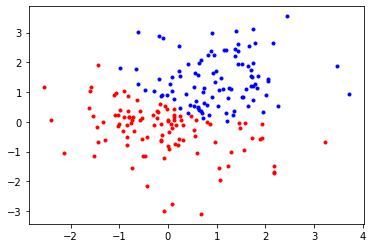

In [72]:
svm=SVC(kernel='rbf')
svm=svm.fit(X, y)
pred=svm.predict(X)
pred=pred.reshape(1,200)
plotClass(X.T,pred,'.')

In [ ]:
#classify with DTs

In [77]:
DTS=tree.DecisionTreeClassifier()
DTS=DTS.fit(X, y)

In [78]:
tree.export_graphviz(DTS, out_file='out.dot', feature_names=['x1','x2'], class_names=['0','1'],)

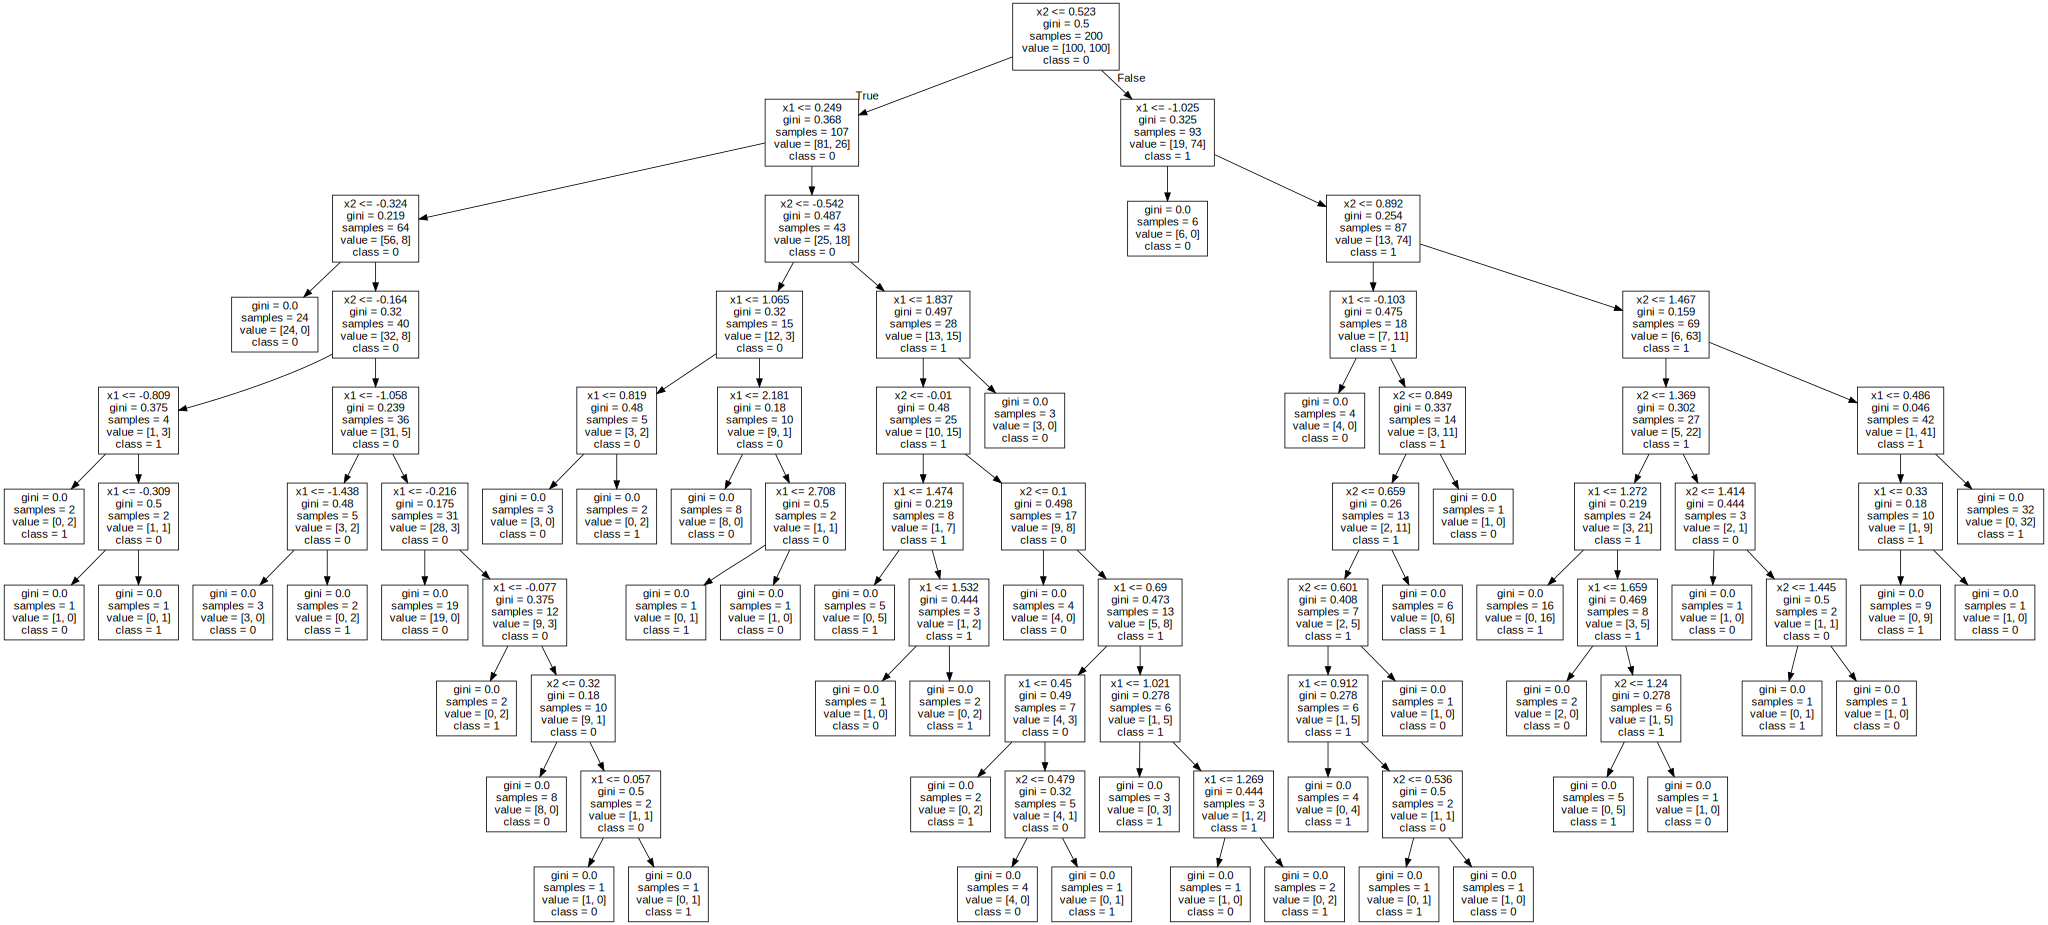

In [80]:
import graphviz
graphviz.Source.from_file('out.dot')

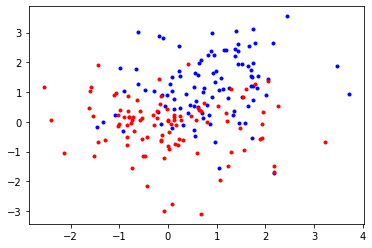

In [83]:
pred=DTS.predict(X)
pred=pred.reshape(1,200)
plotClass(X.T,pred,'.')